In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import seaborn as sns

DO NOT RUN <br>
Combine all CSV datas. run only when adding new climate csv datas.

Daily climate data are available in ClimateData folder for the year 2022 ( Temp, Hum, Prec). Since there was selection limit for data grid collection I had to get them in smaller sizes but more instances. So here I combine them together.

In [5]:
folder_path = 'ClimateData'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

combined_df = pd.DataFrame()

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

output_file = 'combined_data.csv'
# combined_df.to_csv(output_file, index=False)

print(f"All files have been combined into {output_file}")

All files have been combined into combined_data.csv


**Climate Data Analaysis**

In [14]:
columns = ['LAT', 'LON', 'YEAR', 'DOY', 'Temp', 'Humidity', 'Precipitation']

# Load the CSV
file_path = 'combined_data.csv'
climate_data = pd.read_csv(file_path, usecols=range(len(columns)), names=columns, skiprows=1)


# Pivot the data to create a grid for DOY == X ( Indexed based on LON/LAT)
doy = 250
data_Temp = climate_data[climate_data['DOY'] == doy].pivot_table(index='LAT', columns='LON', values='Temp', aggfunc='mean')
data_Humidity = climate_data[climate_data['DOY'] == doy].pivot_table(index='LAT', columns='LON', values='Humidity', aggfunc='mean')
data_Precipitation = climate_data[climate_data['DOY'] == doy].pivot_table(index='LAT', columns='LON', values='Precipitation', aggfunc='mean')

data_Precipitation

LON,-124.75,-124.25,-123.75,-123.25,-122.75,-122.25,-121.75,-121.25,-120.75,-120.25,...,-71.75,-71.25,-70.75,-70.25,-69.75,-69.25,-68.75,-68.25,-67.75,-67.25
LAT,,,,,,,,,,,,,,,,,,,,,
24.75,0.78,0.80,0.75,0.77,0.88,0.97,0.91,0.60,0.33,0.29,...,0.09,0.16,0.29,0.34,0.61,1.15,1.74,1.92,3.03,11.58
25.25,0.72,0.74,0.76,0.74,0.71,0.69,0.64,0.48,0.59,0.75,...,0.16,0.26,0.44,0.57,1.11,2.02,2.67,2.74,5.70,19.16
25.75,0.55,0.60,0.70,0.63,0.52,0.44,0.42,0.39,0.82,1.19,...,0.21,0.31,0.53,0.80,1.49,2.49,3.14,3.18,6.69,19.89
26.25,0.34,0.41,0.49,0.45,0.37,0.31,0.29,0.26,0.55,0.82,...,0.21,0.34,0.56,0.96,1.69,2.54,2.99,3.01,5.30,14.54
26.75,0.19,0.23,0.28,0.30,0.30,0.26,0.22,0.16,0.20,0.23,...,0.22,0.40,0.63,0.97,1.80,2.79,2.95,2.94,4.68,10.69
27.25,0.13,0.13,0.16,0.24,0.27,0.24,0.18,0.09,0.07,0.06,...,0.31,0.59,0.87,1.26,2.52,4.09,4.16,4.23,6.21,13.10
27.75,0.12,0.10,0.12,0.21,0.24,0.21,0.13,0.06,0.03,0.04,...,0.45,0.87,2.25,2.57,4.02,6.29,6.56,6.50,8.23,15.01
28.25,0.11,0.10,0.12,0.19,0.18,0.13,0.07,0.03,0.02,0.02,...,0.49,0.93,3.24,3.57,5.07,7.64,7.98,7.84,8.09,10.66
28.75,0.11,0.11,0.12,0.15,0.11,0.06,0.04,0.02,0.02,0.02,...,0.39,0.72,2.60,3.35,5.17,7.71,8.11,7.96,7.25,6.97


In [17]:
import ipywidgets as widgets
from ipywidgets import interact

global_min_temp = 0
global_max_temp = climate_data['Temp'].max()
global_min_humidity = climate_data['Humidity'].min()
global_max_humidity = climate_data['Humidity'].max()
global_min_precipitation = 20
global_max_precipitation = 60

# Function to update the plots based on the selected DOY
def update_plots(doy):
    data_doyX = climate_data[climate_data['DOY'] == doy]
    
    data_Temp = data_doyX.pivot_table(index='LAT', columns='LON', values='Temp', aggfunc='mean')
    data_Humidity = data_doyX.pivot_table(index='LAT', columns='LON', values='Humidity', aggfunc='mean')
    data_Precipitation = data_doyX.pivot_table(index='LAT', columns='LON', values='Precipitation', aggfunc='mean')
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    # Plot the temperature grid with consistent color range
    im1 = axes[0].imshow(data_Temp, cmap='plasma', origin='lower', vmin=global_min_temp, vmax=global_max_temp)
    axes[0].set_title(f'Temperature Grid for DOY {doy}')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].figure.colorbar(im1, ax=axes[0], label='Temperature')

    # Plot the humidity grid with consistent color range
    im2 = axes[1].imshow(data_Humidity, cmap='YlGnBu', origin='lower', vmin=global_min_humidity, vmax=global_max_humidity)
    axes[1].set_title(f'Humidity Grid for DOY {doy}')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].figure.colorbar(im2, ax=axes[1], label='Humidity')

    # Plot the precipitation grid with consistent color range
    im3 = axes[2].imshow(data_Precipitation, cmap='PuBuGn', origin='lower', vmin=global_min_precipitation, vmax=global_max_precipitation)
    axes[2].set_title(f'Precipitation Grid for DOY {doy}')
    axes[2].set_xlabel('Longitude')
    axes[2].set_ylabel('Latitude')
    axes[2].figure.colorbar(im3, ax=axes[2], label='Precipitation')

    plt.tight_layout()
    plt.show()

# Create the slider widget
doy_slider = widgets.IntSlider(
    value=250,
    min=1,
    max=365,
    step=1,
    description='DOY:',
    continuous_update=False
)

# Use the interact function to connect the slider with the update function
interact(update_plots, doy=doy_slider)



interactive(children=(IntSlider(value=250, continuous_update=False, description='DOY:', max=365, min=1), Outpu…

<function __main__.update_plots(doy)>

**Suitability Data**

dict_keys(['crs', 'longitude', 'latitude', 'layer'])


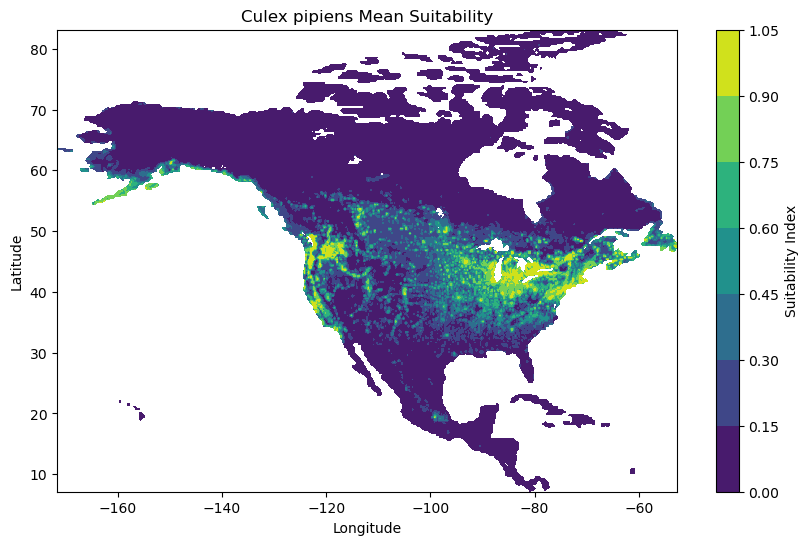

In [66]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Load the NetCDF file
file_path = "culex_pipiens_meansuitability.nc"
dataset = nc.Dataset(file_path)
print(dataset.variables.keys())

suitability = dataset.variables['layer'][:]
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]
lon, lat = np.meshgrid(lon, lat)

plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, suitability, cmap='viridis')
plt.colorbar(label='Suitability Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Culex pipiens Mean Suitability')
plt.show()


In [19]:
file_path = "culex_pipiens_meansuitability.nc"
data = nc.Dataset(file_path)
longitude = data.variables['longitude'][:]
latitude = data.variables['latitude'][:]
suitability = data.variables['layer'][:]
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

suitability_data = pd.DataFrame({
    'LAT': lat_grid.flatten(),
    'LON': lon_grid.flatten(),
    'S': suitability.flatten()
})

suitability_data = suitability_data[
    (suitability_data['LAT'] >= 24.75) & (suitability_data['LAT'] <= 49.25) &
    (suitability_data['LON'] >= -124.75) & (suitability_data['LON'] <= -67.25)
]

data_Suitability = suitability_data.pivot_table(index='LAT', columns='LON', values='S', aggfunc='mean')
data_Suitability = data_Suitability.fillna(0)
data_Suitability


LON,-124.666667,-124.416667,-124.166667,-123.916667,-123.666667,-123.416667,-123.166667,-122.916667,-122.666667,-122.416667,...,-69.666667,-69.416667,-69.166667,-68.916667,-68.666667,-68.416667,-68.166667,-67.916667,-67.666667,-67.416667
LAT,,,,,,,,,,,,,,,,,,,,,
24.875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25.375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25.625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25.875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48.125,0.234153,0.324646,0.256042,0.198978,0.248100,0.900225,0.251291,0.000000,0.000000,0.902264,...,0.391674,0.000000,0.000000,0.354072,0.295963,0.299687,0.275842,0.242956,0.226685,0.164696
48.375,0.179294,0.534832,0.577125,0.447758,0.162424,0.000000,0.000000,0.000000,0.994902,0.998993,...,0.173954,0.371839,0.000000,0.000000,0.324644,0.449133,0.470447,0.376247,0.353473,0.678949
48.625,0.213299,0.223060,0.177974,0.264254,0.272357,0.188977,0.000000,0.000000,0.836603,0.986029,...,0.114132,0.157261,0.608473,0.000000,0.000000,0.000000,0.594998,0.512686,0.512967,0.481369


***Clux Distribution*** <br>
Generating a relative distribution based on the 'Culex Pipiens' suitabilty data and mean daily temprature for each grid point on specific DOY.
Dataframe data_Temp is based on a specific DOY (Day Of the Year).

In [20]:
import pandas as pd
import numpy as np

def estimate_mosquito_abundance(mean_temp, suitability_index, base_population=1000):
    if suitability_index < 0.15:
        return 0
    temp_suitability = mosquito_abundance_probability(mean_temp)
    combined_suitability = 0.267 * temp_suitability + (1 - 0.267) * suitability_index
    estimated_abundance = combined_suitability * base_population
    return estimated_abundance

def mosquito_abundance_probability(T):
    optimal_temp = 25  # Optimal temperature for Culex mosquitoes
    sigma = 5
    if T >= optimal_temp :
        sigma = 9  # Controls the width of the peak around the optimal temperature
    temp_factor = np.exp(-0.5 * ((T - optimal_temp) / sigma) ** 2)  # Gaussian function for temperature
    temp_factor = np.clip(temp_factor, 0, 1)  # Ensuring values are between 0 and 1
    return temp_factor * (1 - (T - 25) / 26)  # Gradually decrease after 26

def apply_estimate_mosquito_abundance(row, temp_resampled):
    lon = row.name
    result_row = []
    for lat, suitability_index in row.items():
        mean_temp = temp_resampled.at[lon, lat]
        result = estimate_mosquito_abundance(mean_temp, suitability_index)
        result_row.append(result)
    return pd.Series(result_row, index=row.index)

data_Temp_resampled = data_Temp.reindex(index=data_Suitability.index, columns=data_Suitability.columns, method='nearest')
culex_distribution = data_Suitability.apply(apply_estimate_mosquito_abundance, axis=1, temp_resampled=data_Temp_resampled)
culex_distribution_rounded = culex_distribution.round(0)

culex_distribution_rounded


LON,-124.666667,-124.416667,-124.166667,-123.916667,-123.666667,-123.416667,-123.166667,-122.916667,-122.666667,-122.416667,...,-69.666667,-69.416667,-69.166667,-68.916667,-68.666667,-68.416667,-68.166667,-67.916667,-67.666667,-67.416667
LAT,,,,,,,,,,,,,,,,,,,,,
24.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48.125,204.0,265.0,215.0,174.0,210.0,712.0,236.0,0.0,0.0,729.0,...,385.0,0.0,0.0,319.0,276.0,277.0,259.0,231.0,219.0,173.0
48.375,164.0,419.0,450.0,356.0,147.0,0.0,0.0,0.0,797.0,800.0,...,225.0,346.0,0.0,0.0,298.0,386.0,402.0,329.0,312.0,550.0
48.625,184.0,194.0,161.0,262.0,268.0,214.0,0.0,0.0,683.0,780.0,...,0.0,187.0,517.0,0.0,0.0,0.0,483.0,417.0,417.0,390.0


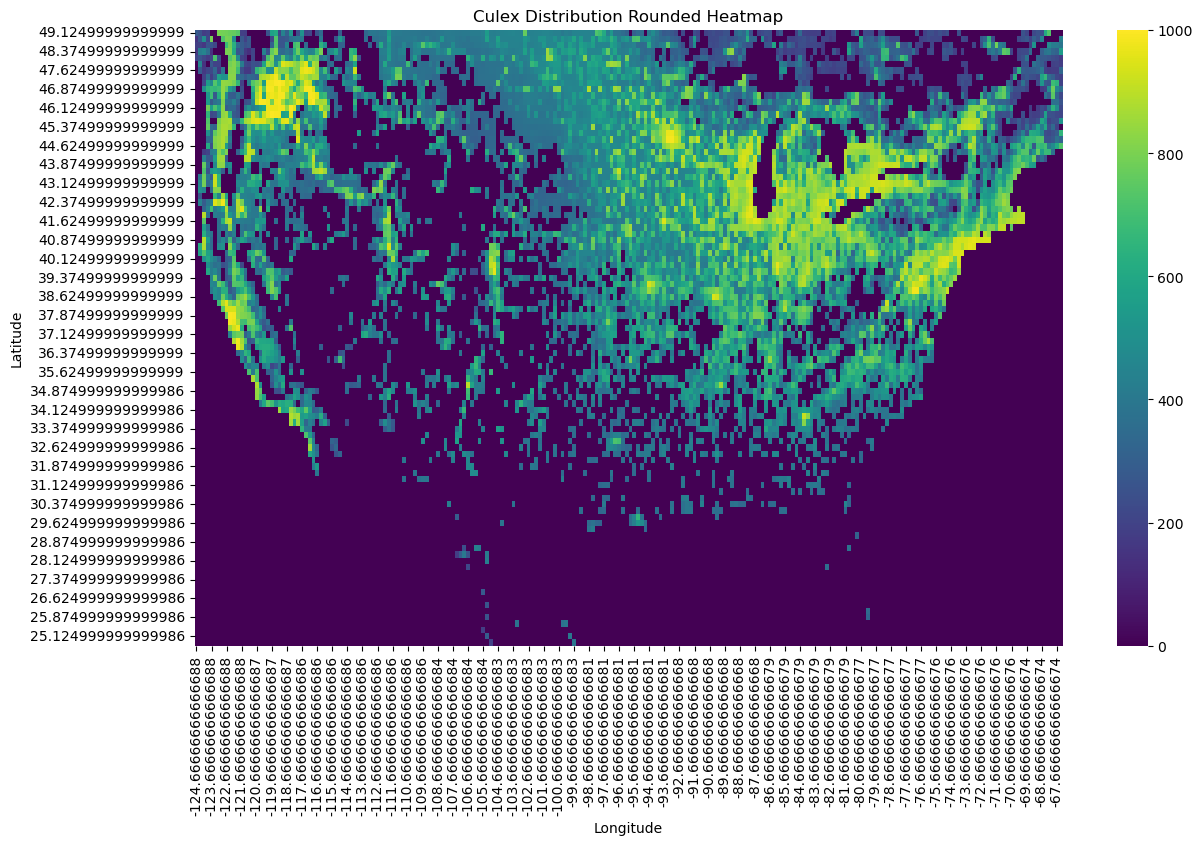

In [21]:
# Reverse the order of the latitude values if needed
# culex_distribution_rounded = culex_distribution_rounded.iloc[::-1]
plt.figure(figsize=(14, 8))
sns.heatmap(culex_distribution_rounded.iloc[::-1], cmap='viridis', cbar=True)
plt.title('Culex Distribution Rounded Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [22]:
total_mosquito_abundance = culex_distribution_rounded.sum().sum()
total_mosquito_abundance

4690230.0

Scale dimensions by 4 times : From '98 rows × 230 columns' To '392 rows × 920 columns'
Scale population by scale_populataion = 100

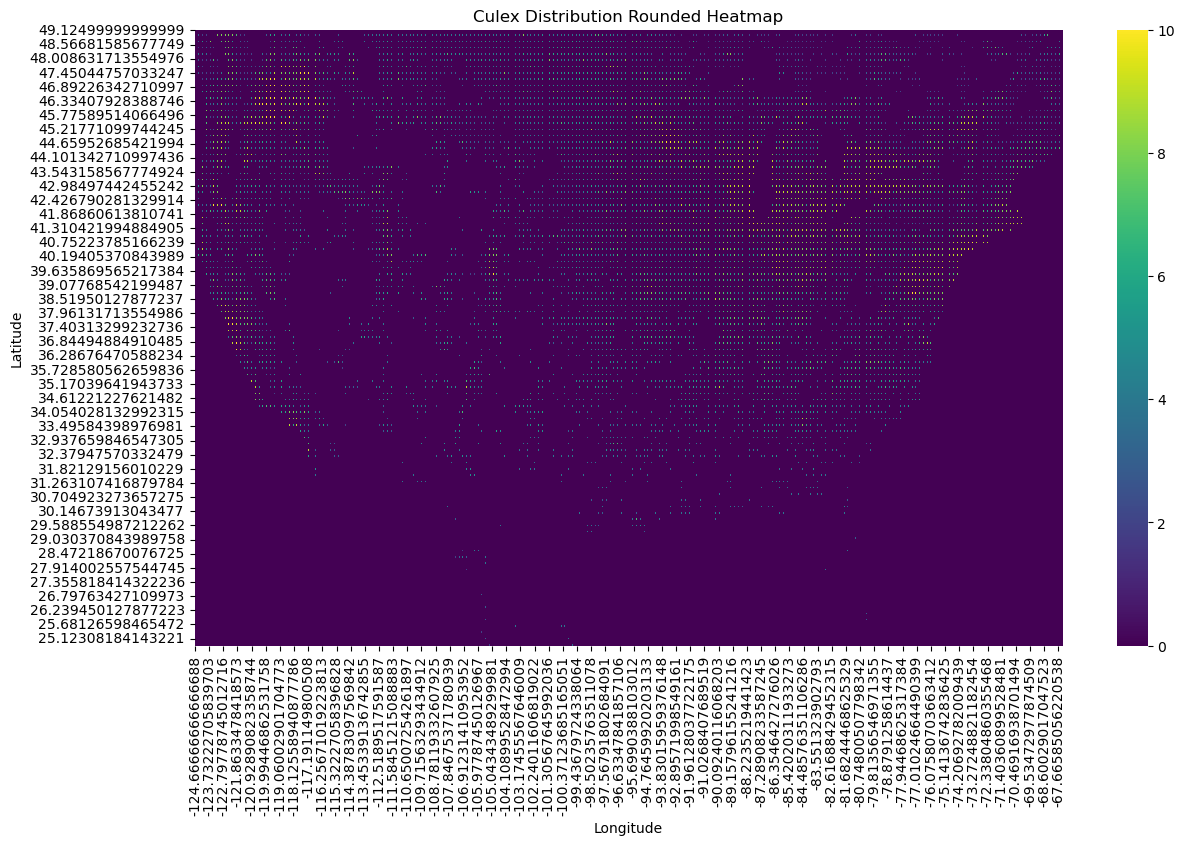

,-124.666667,-124.604371,-124.542075,-124.479779,-124.417483,-124.355187,-124.292891,-124.230595,-124.168299,-124.106003,...,-67.977330,-67.915034,-67.852738,-67.790443,-67.728147,-67.665851,-67.603555,-67.541259,-67.478963,-67.416667
24.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.937020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.999041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.061061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.123082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48.876918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48.938939,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49.000959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49.062980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Step 1: Convert to a NumPy array
culex_array = culex_distribution_rounded.values

# Define the scaling factor
scale_factor = 4
scale_populataion = 100

# Step 2: Upscale by repeating each element 20 times along both axes
# expanded_array = np.repeat(np.repeat(culex_array, scale_factor, axis=0), scale_factor, axis=1)
expanded_array = np.zeros((culex_array.shape[0] * scale_factor, culex_array.shape[1] * scale_factor))

# Step 3: Convert back to a DataFrame
expanded_array[::scale_factor, ::scale_factor] = culex_array
# Generate new indices and columns to match the expanded dimensions
new_index = np.linspace(culex_distribution_rounded.index.min(), culex_distribution_rounded.index.max(), expanded_array.shape[0])
new_columns = np.linspace(culex_distribution_rounded.columns.min(), culex_distribution_rounded.columns.max(), expanded_array.shape[1])

culex_distribution_rounded_expanded = pd.DataFrame(expanded_array, index=new_index, columns=new_columns)

culex_distribution_rounded_expanded = (culex_distribution_rounded_expanded/scale_populataion).round(0)

plt.figure(figsize=(14, 8))
sns.heatmap(culex_distribution_rounded_expanded.iloc[::-1], cmap='viridis', cbar=True)
plt.title('Culex Distribution Rounded Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

culex_distribution_rounded_expanded


In [30]:
culex_distribution_rounded_expanded.sum().sum()

46904.0

Convert coordinate indices to normal integer indeces for use in gird indexing

In [31]:
# Resetting the index to replace lat/lon with normal integer index
culex_distribution_rounded_expanded_reset = culex_distribution_rounded_expanded.reset_index(drop=True)

# Rename columns to integer indices
culex_distribution_rounded_expanded_reset.columns = range(culex_distribution_rounded_expanded_reset.shape[1])

# Now the DataFrame will have integer indices for both rows and columns
# culex_distribution_rounded_expanded_reset


culex_distribution_rounded_expanded_reset.to_parquet('culex_distribution.parquet')

culex_distribution_rounded_expanded_reset

,0,1,2,3,4,5,6,7,8,9,...,910,911,912,913,914,915,916,917,918,919
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
392 * 920

360640

In [32]:
(culex_distribution_rounded_expanded == 0).sum().sum()

351649

In [27]:
(124.416667 - 85.416667) / (632) * 85.39

5.269319620253165

In [28]:
(49.125000 - 24.875000) / 392  * 111.32

6.8865051020408155

In [36]:
392 * 920  

360640

In [33]:
import pandas as pd
culex_distribution = pd.read_parquet('culex_distribution.parquet')
culex_distribution.sum().sum()
culex_distribution
# culex_distribution

,0,1,2,3,4,5,6,7,8,9,...,910,911,912,913,914,915,916,917,918,919
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
